In [18]:
import pandas as pd 
from matplotlib.pyplot import figure
import networkx as nx
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [19]:
df = pd.read_csv('save_inferences/hashtag.csv')
df.head()

,weight,left,right
0,1,#03,#15년
1,1,#03,#21살
2,1,#03,#badminton
3,1,#03,#daily
4,1,#03,#dmv


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32973 entries, 0 to 32972
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   weight  32973 non-null  int64 
 1   left    32973 non-null  object
 2   right   32973 non-null  object
dtypes: int64(1), object(2)
memory usage: 772.9+ KB


<AxesSubplot: >

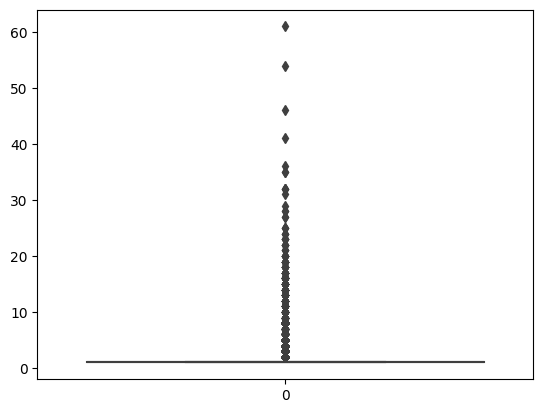

In [29]:
sns.boxplot(df['weight'])

In [30]:
df1 = df[df['weight'] > 10]

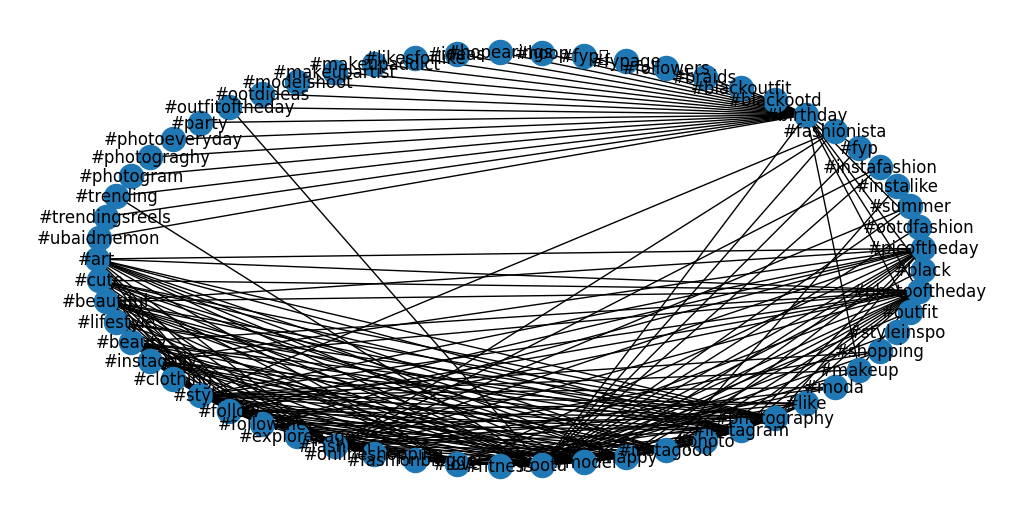

In [31]:

G = nx.Graph()
G = nx.from_pandas_edgelist(df1, 'left', 'right')
figure(figsize=(10, 5))
nx.draw_shell(G, with_labels=True)

Counter({2: 29, 0: 18, 1: 14})


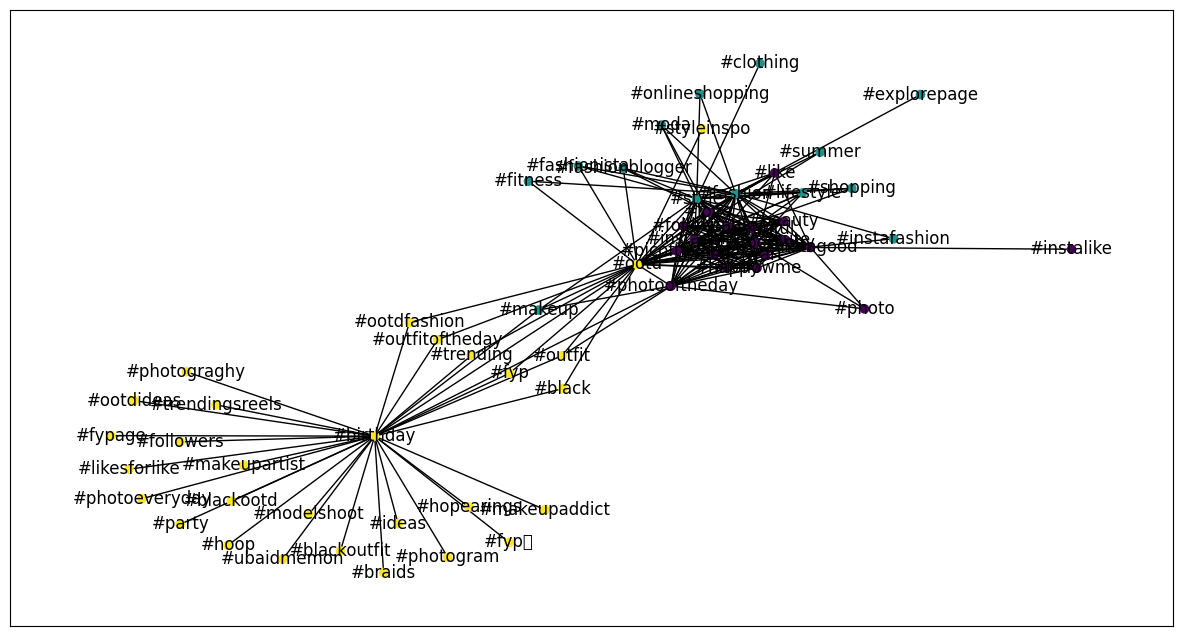

In [32]:
import community
import collections

partition = community.best_partition(G)
values = [partition.get(node) for node in G.nodes()]
counter=collections.Counter(values)
print(counter)
sp = nx.spring_layout(G)
figure(figsize=(15, 8))
nx.draw_networkx(G, pos=sp, with_labels=True, node_size=35, node_color=values)

In [33]:
v_nodes = set() 
e_nodes = [] 
for ix, row in df1.iterrows():
    v_nodes.add(row['left'])
    v_nodes.add(row['right'] ) 
    e_nodes.append(tuple([row['left'], row['right'], row['weight']])) 

In [34]:
G = nx.DiGraph() 
G.add_nodes_from(v_nodes)
G.add_weighted_edges_from(e_nodes)

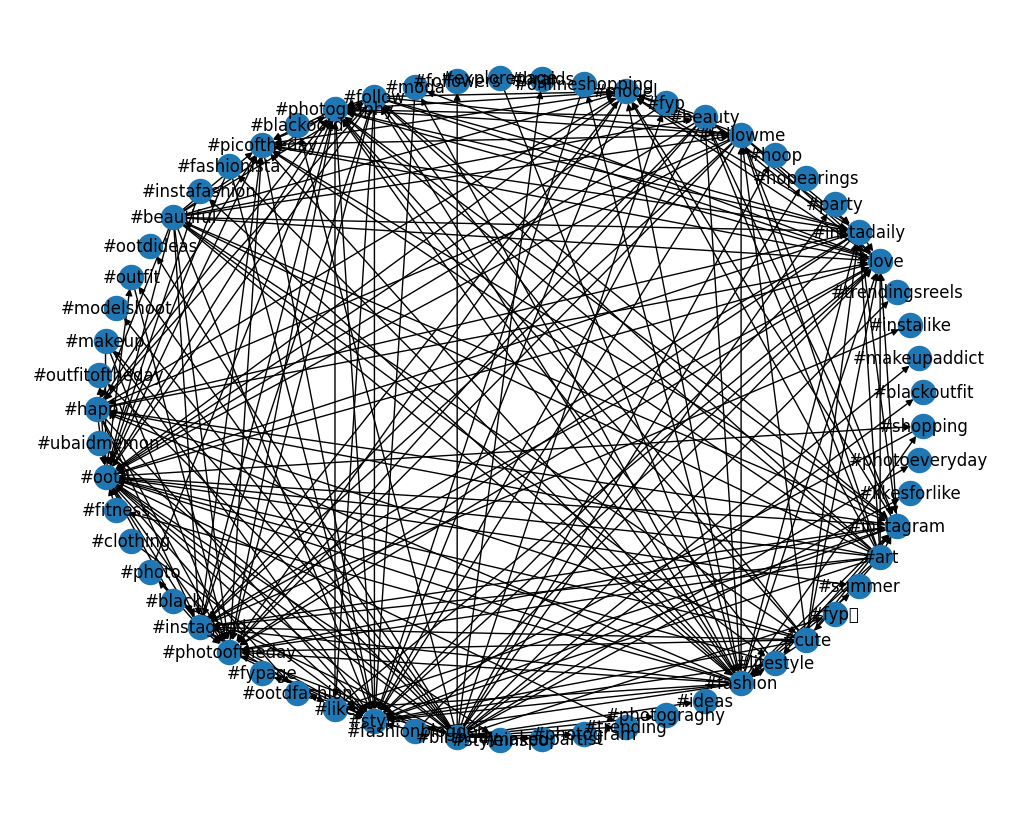

In [35]:
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

Counter({2: 29, 0: 18, 1: 14})


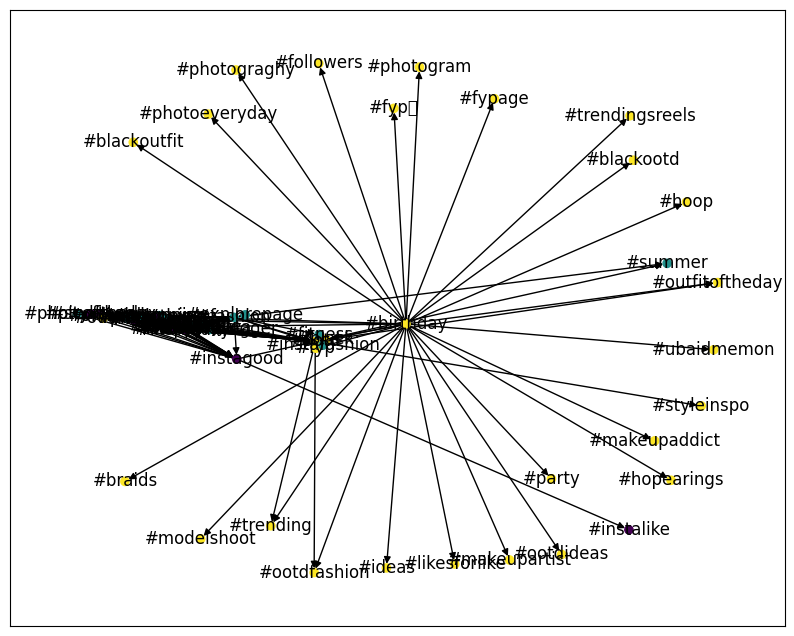

In [36]:

values = [partition.get(node) for node in G.nodes()]
counter=collections.Counter(values)
print(counter)
sp = nx.spring_layout(G)
figure(figsize=(10, 8))
nx.draw_networkx(G, pos=sp, with_labels=True, node_size=35, node_color=values)